In [121]:
import tensorflow.keras.utils as image
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tqdm import tqdm
from matplotlib import pyplot as plt

In [122]:
csv_file = 'image_feature.csv'
df = pd.read_csv(csv_file)

In [123]:
df.head()

,img_id,absorbance
0,Image000,0.3043
1,Image001,0.8746
2,Image002,4.2235
3,Image003,3.6416
4,Image004,0.7311


In [124]:
df_image = []
image_width = 60
image_height = 60
image_area = image_width * image_height * 3
for i in tqdm(range(df.shape[0])):
    img = image.load_img(r'image\\image_dataset\\'+df['img_id'][i]+'.jpg', target_size=(image_width,image_height,3))
    img = image.img_to_array(img)
    df_image.append(img)
X = np.array(df_image)
X_col = len(df.index)
X = X.reshape(X_col, image_area)
X /= 255

100%|████████████████████████████████████████████████████████████████████████████████| 136/136 [00:04<00:00, 32.55it/s]


In [125]:
#le = LabelEncoder()
#df['stress_condition'] = le.fit_transform(df['stress_condition'])

y_regr1 = np.array(df['absorbance'])
#y_regr2 = np.array(df['biomass_yield'])
#y_class = np.array(df['stress_condition'])
#n_class = len(np.unique(y_class[:]))

X_train, X_test, y_regr1_train, y_regr1_test = train_test_split(X, y_regr1, test_size=0.1, random_state=1)

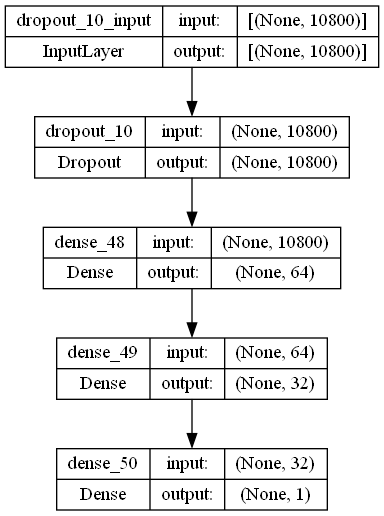

In [130]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(image_area,)))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

#visible = visible.add(Dropout(0.2, input_shape=(image_area,)))
#visible = Input(shape=(image_area,))
#hidden1 = Dense(64, activation='relu', kernel_initializer='he_normal')(visible)
#hidden2 = Dense(32, activation='relu', kernel_initializer='he_normal')(hidden1)
#regr1_out = Dense(1, activation='linear')(hidden2)
#regr2_out = Dense(1, activation='linear')(hidden2)
#class_out = Dense(n_class, activation='softmax')(hidden2)
#model = Model(inputs=visible, outputs=regr1_out)

model.compile(loss=['mse','sparse_categorical_crossentropy'], optimizer='adam')
image.plot_model(model, to_file='model.png', show_shapes=True)

In [131]:
history = model.fit(X_train, y_regr1_train, epochs=30, batch_size=24, validation_data=(X_test, y_regr1_test), verbose=2, shuffle=True)
yhat1 = model.predict(X_test)

error1 = sklearn.metrics.mean_absolute_error(y_regr1_test, yhat1)
print('MAE (absorbance): %.3f' % error1)

Epoch 1/30
6/6 - 0s - loss: 13.4793 - val_loss: 0.7175 - 288ms/epoch - 48ms/step
Epoch 2/30
6/6 - 0s - loss: 3.8444 - val_loss: 0.4202 - 39ms/epoch - 7ms/step
Epoch 3/30
6/6 - 0s - loss: 2.8555 - val_loss: 0.2701 - 40ms/epoch - 7ms/step
Epoch 4/30
6/6 - 0s - loss: 1.1540 - val_loss: 0.6296 - 42ms/epoch - 7ms/step
Epoch 5/30
6/6 - 0s - loss: 0.6027 - val_loss: 0.5515 - 38ms/epoch - 6ms/step
Epoch 6/30
6/6 - 0s - loss: 0.4843 - val_loss: 0.5720 - 38ms/epoch - 6ms/step
Epoch 7/30
6/6 - 0s - loss: 0.4467 - val_loss: 0.4875 - 39ms/epoch - 7ms/step
Epoch 8/30
6/6 - 0s - loss: 0.4550 - val_loss: 0.4174 - 38ms/epoch - 6ms/step
Epoch 9/30
6/6 - 0s - loss: 0.2881 - val_loss: 0.5614 - 37ms/epoch - 6ms/step
Epoch 10/30
6/6 - 0s - loss: 0.2989 - val_loss: 0.3080 - 38ms/epoch - 6ms/step
Epoch 11/30
6/6 - 0s - loss: 0.2091 - val_loss: 0.3464 - 37ms/epoch - 6ms/step
Epoch 12/30
6/6 - 0s - loss: 0.2164 - val_loss: 0.3664 - 38ms/epoch - 6ms/step
Epoch 13/30
6/6 - 0s - loss: 0.1855 - val_loss: 0.3038 - 3

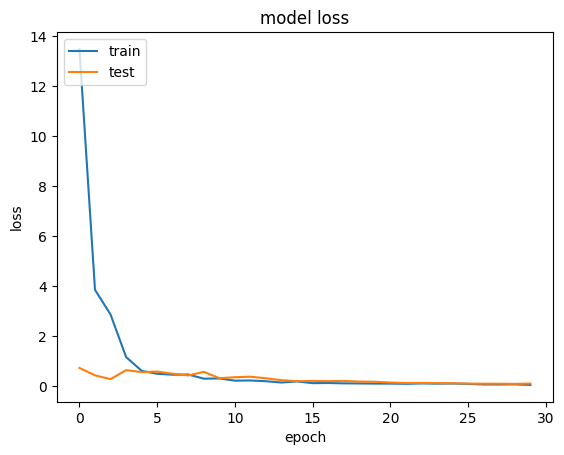

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [133]:
model.save('test1_ANN')

INFO:tensorflow:Assets written to: test1_ANN\assets
